## AYUSH SINGHAL
### DATA SCIENCE INTERN AT LETSGROWMORE
### INTERMEDIATE LEVEL TASK-2 : PREDICTION USING DECISION TREE

In [1]:
#importing required libraries
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier 
#to draw the graph
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_url = "Iris.csv"
iris_df = pd.read_csv(data_url)
iris_df.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [3]:
#dropping column id
iris_df.drop(columns='Id',axis=1,inplace=True)
iris_df.head(100)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [4]:
# different class labels avaliable
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


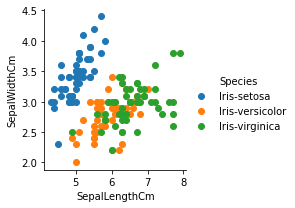

In [6]:
#visualing data
sns.FacetGrid(iris_df, hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
   .add_legend()
plt.show()

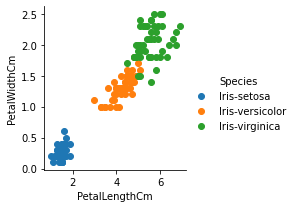

In [7]:
sns.FacetGrid(iris_df, hue = 'Species') \
   .map(plt.scatter, 'PetalLengthCm','PetalWidthCm') \
   .add_legend()
plt.show()

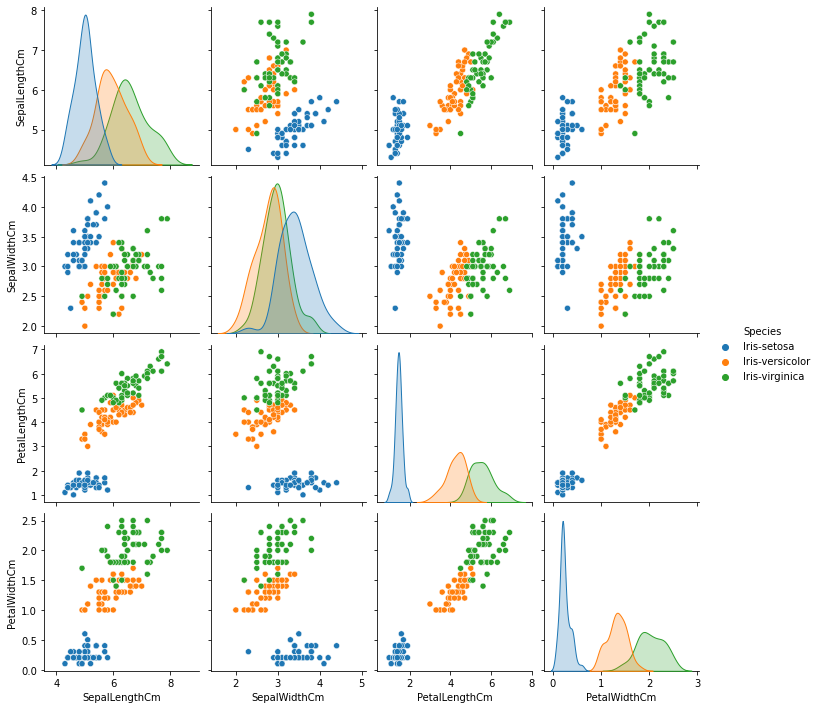

In [8]:
sns.pairplot(iris_df, hue='Species')
plt.show()

In [9]:
#adding a label to class
classes = {
    
    'Iris-setosa': 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2
    }
iris_df = iris_df.replace({'Species': classes})
iris_df.head(100)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [10]:
#selecting features
X = iris_df.iloc[:,:4]
y = iris_df.iloc[:,4]
#converting it into an array
X = np.array (X)
y = np.array (y)

In [11]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [13]:

from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [14]:
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

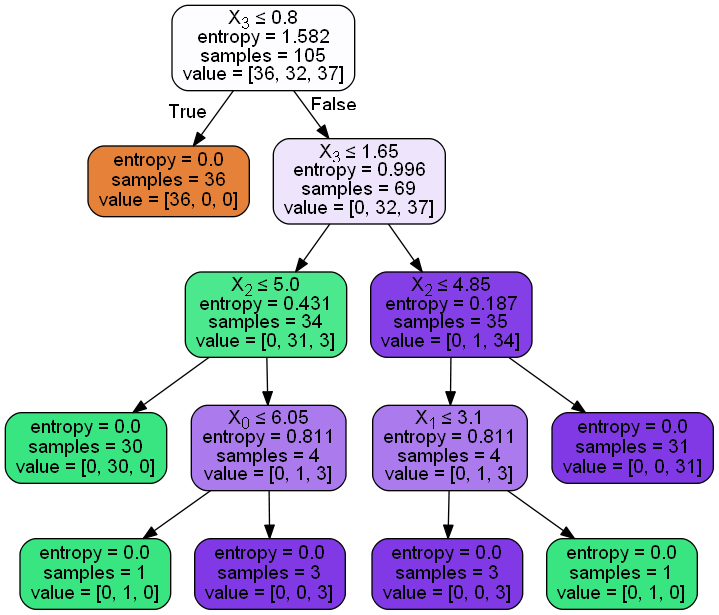

In [15]:
#storing it into the var dot_data
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=600, height=300)

In [16]:
predict = tree.predict(X_test)
predict

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1], dtype=int64)

In [17]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test, predict))

Accuracy: 0.9555555555555556


# Thank You 